# Task 2 Perceptron training algorithm for multi-class classification

In [1]:
#/==================================
#// Computer Vision
#// Student: Vandit Jyotindra Gajjar
#// Student ID: a1779153
#// Semester: 1
#// Year: 2020
#// Assignment: 3
#//===================================

In [2]:
import scipy.io as sio
import numpy as np

import os.path
if not os.path.isfile('training_data.mat'):
  from google.colab import files
  uploaded = files.upload()
  
  
  
data = sio.loadmat('training_data.mat')
X = np.array(data['X'])

X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
Y = np.array(data['Y'])

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape)

Training data shape: (15468, 3)
Labels shape: (15468, 1)


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

In [4]:
class Perceptron:

    def __init__(self,input_size):

        self.input_size = input_size
        self.w_0 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w_1 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w_2 = np.random.randn(input_size,1).reshape(input_size,1)
        self.history = []
        
    def train(self,X,Y, max_epochs = 100):

        self.history = []
        
        converged = False
        epochs = 0

        Y_0, Y_1, Y_2 = Y.copy(), Y.copy(), Y.copy()
        Y_0[Y_0 == 1], Y_0[Y_0 == 0], Y_0[Y_0 == 2] = 2, 1, 0
        Y_1[Y_1 == 0], Y_1[Y_1 == 2] = 2, 0
        Y_2[Y_2 == 1], Y_2[Y_2 == 2]  = 0, 1
        
        
        while not converged and epochs < max_epochs :

            converged, l_r = True, 0.001
            for i in range(len(X)):                        
                res = np.matmul(X[i], self.w_0) 
                if res >= 0: 
                    res = 1.0
                else:
                    res = 0.0
                if res != Y_0[i]:
                    converged = False
                    self.w_0 = self.w_0 + (Y_0[i] - res) * l_r * X[i].reshape(-1,1) 
                res = np.matmul(X[i], self.w_1) 
                if res >= 0: 
                    res = 1.0
                else:
                    res = 0.0
                if res != Y_1[i]:
                    converged = False
                    self.w_1 = self.w_1 + (Y_1[i] - res) * l_r * X[i].reshape(-1,1) 
                res = np.matmul(X[i], self.w_2) 
                if res >= 0: 
                    res = 1.0
                else:
                    res = 0.0
                if res != Y_2[i]:
                    converged = False
                    self.w_2 = self.w_2 + (Y_2[i] - res) * l_r * X[i].reshape(-1,1) 
            self.compute_train_accuracy(X,Y)
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged", epochs)
          
        self.plot_training_history()

    def draw(self,X):
      
        pl.close()
        pl.figure(figsize=[10,8]) 
        pl.xlim((0,1))
        pl.ylim((0,1))
        res_1, res_2, res_3 = np.matmul(X,self.w_0).squeeze(), np.matmul(X,self.w_1).squeeze(), np.matmul(X,self.w_2).squeeze()
        P1, P2, P3 = X[res_1 >= 0,:], X[res_2 >= 0,:], X[res_3 >= 0,:]
 
        pl.plot(P1[:,0],P1[:,1],'ro', label = 'Class 0')
        pl.plot(P2[:,0],P2[:,1],'go', label = 'Class 1')
        pl.plot(P3[:,0],P3[:,1],'bo', label = 'Class 2')

        x_1, x_3, x_2 = np.linspace(0.55,-0.48), np.linspace(-1,1), np.linspace(-0.55,0.48)
        pl.plot(x_3, np.linspace(-0.00,-0.00), label = 'Ground-Truth-1')
        pl.plot(x_2, np.linspace(-0.9,0.9), label = 'Ground-Truth-2')
        pl.plot(x_1,np.linspace(-0.9,0.9), label = 'Ground-Truth-3')

        a1, b1, c1 = self.w_0[0], self.w_0[1], self.w_0[2]
        pl.plot(x_1, -a1/b1 * x_1 - c1/b1, label = 'Estimated-Line-1')

        a2, b2, c2 = self.w_1[0], self.w_1[1], self.w_1[2]
        pl.plot(x_2, -a2/b2 * x_2 - c2/b2, label = 'Estimated-Line-2')

        a3, b3, c3 = self.w_2[0], self.w_2[1], self.w_2[2]
        pl.plot(x_3, -a3/b3 * x_3 - c3/b3, label = 'Estimated-Line-3')
        
        pl.axis('tight')
        pl.legend()        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)

    def compute_train_accuracy(self,X,Y):
        res_0 = np.matmul(X,self.w_0)
        Y_bar0 = (res_0 >= 0)
        
        res_1 = np.matmul(X,self.w_1)
        Y_bar1 = (res_1 >= 0)
        
        res_2 = np.matmul(X,self.w_2)
        Y_bar2 = (res_2 >= 0)
        
        Y_bar = Y_bar0 + Y_bar1 + Y_bar2
        
        accuracy = np.count_nonzero(Y_bar) / np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)

    def plot_training_history(self):
        pl.close()
        plt.figure(figsize=[10,8])
        plt.ylim((0,1.01))
        plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()

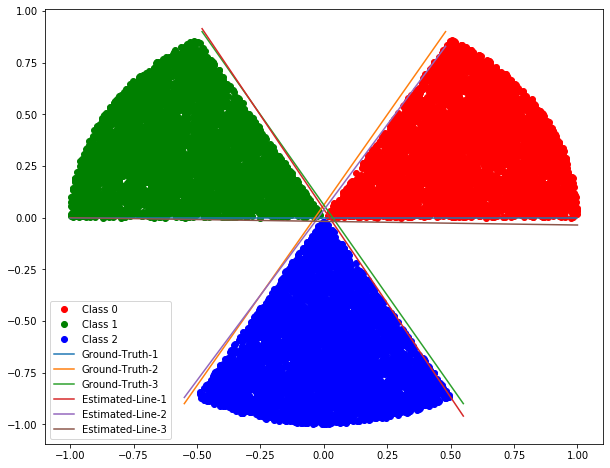

Qutting: Converged 34


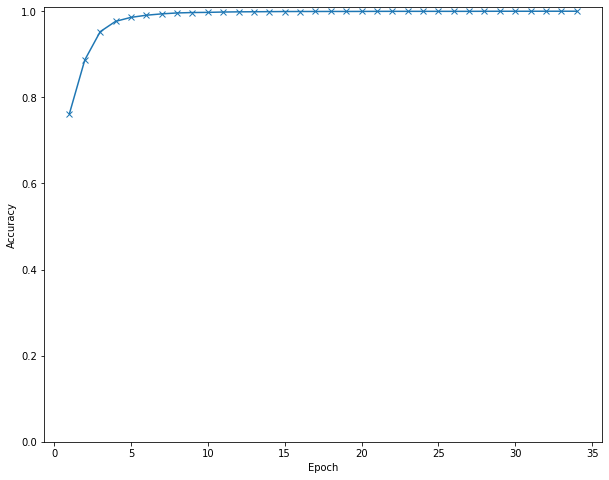

In [5]:
number_of_samples = 100
max_number_of_epochs = 35


p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)